In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import colors
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
home = pd.read_csv('/Users/lilyyang/Desktop/Machine Learning/HW/Assignment 1/home_data.csv')

In [3]:
home.isna().sum().sum()

0

## PART 1


1. Selection and summary statistics:
Which neighborhood (zip code) of Seattle has the highest average house sale price? Now, take
the sales data, select only the houses with this zip code, and compute the average price.

In [6]:
home.info

<bound method DataFrame.info of                id             date   price  bedrooms  bathrooms  sqft_living  \
0      7129300520  20141013T000000  221900         3       1.00         1180   
1      6414100192  20141209T000000  538000         3       2.25         2570   
2      5631500400  20150225T000000  180000         2       1.00          770   
3      2487200875  20141209T000000  604000         4       3.00         1960   
4      1954400510  20150218T000000  510000         3       2.00         1680   
...           ...              ...     ...       ...        ...          ...   
21608   263000018  20140521T000000  360000         3       2.50         1530   
21609  6600060120  20150223T000000  400000         4       2.50         2310   
21610  1523300141  20140623T000000  402101         2       0.75         1020   
21611   291310100  20150116T000000  400000         3       2.50         1600   
21612  1523300157  20141015T000000  325000         2       0.75         1020   

       

In [7]:
home.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
home['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [9]:
home['zipcode'].nunique()

70

In [10]:
highest_avg_zip = home.groupby('zipcode')['price'].mean().idxmax()
highest_avg_zip 

98039

In [11]:
filtered_zip = home[home['zipcode'] == highest_avg_zip]
filtered_zip.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2974,3625049014,20140829T000000,2950000,4,3.5,4860,23885,2.0,0,0,...,12,4860,0,1996,0,98039,47.6172,-122.230,3580,16054
3761,2540700110,20150212T000000,1905000,4,3.5,4210,18564,2.0,0,0,...,11,4210,0,2001,0,98039,47.6206,-122.225,3520,18564
4077,3262300940,20141107T000000,875000,3,1.0,1220,8119,1.0,0,0,...,7,1220,0,1955,0,98039,47.6328,-122.236,1910,8119
4078,3262300940,20150210T000000,940000,3,1.0,1220,8119,1.0,0,0,...,7,1220,0,1955,0,98039,47.6328,-122.236,1910,8119
4149,6447300265,20141014T000000,4000000,4,5.5,7080,16573,2.0,0,0,...,12,5760,1320,2008,0,98039,47.6151,-122.224,3140,15996


In [12]:
filtered_zip['price'].mean()

2160606.6

2. Filtering data:
One of the key features is the number of square feet of living space (‘sqft_living’) in the house.
Select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft. What
fraction of the all houses have ‘sqft_living’ in this range?

In [14]:
filtered_sqft = home[(home['sqft_living'] > 2000) & (home['sqft_living'] <= 4000)]
filtered_sqft.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
10,1736800520,20150403T000000,662500,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
15,9297300055,20150124T000000,650000,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
21,2524049179,20140826T000000,2000000,3,2.75,3050,44867,1.0,0,4,...,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
22,7137970340,20140703T000000,285000,5,2.50,2270,6300,2.0,0,0,...,8,2270,0,1995,0,98092,47.3266,-122.169,2240,7005


In [15]:
frac_sqft = len(filtered_sqft) / len(home)
frac_sqft

0.42187572294452413

3. Visualization:
Plot the relationship between ‘house sale price’ and ‘sqft_living’.

In [17]:
import seaborn as sns

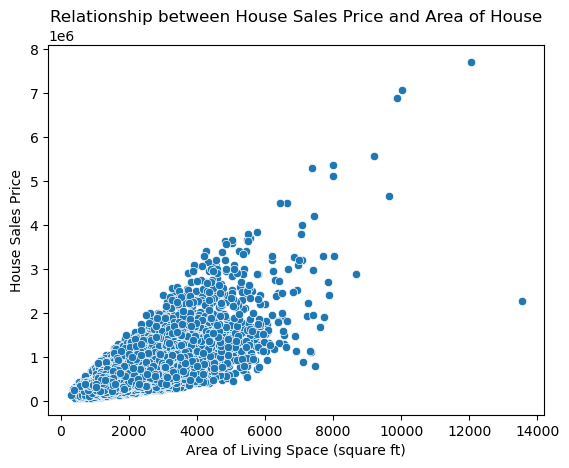

In [18]:
sns.scatterplot(data=home, x='sqft_living',y='price')
plt.title('Relationship between House Sales Price and Area of House')
plt.xlabel('Area of Living Space (square ft)')
plt.ylabel('House Sales Price')
plt.show()

4. Building regression models with different features (all models must be fit on the original
sales dataset, not the one filtered on `sqft_living`. Do NOT split the data into training and
test sets):

Build a regression model to predict house prices using just ‘sqft_living’ and add the trend line in
the plot in part 3. Report the intercept and slope.
Using this simple regression model, what is the predicted price for a house with 2650 sqft?
Using this simple regression model, what is the estimated square-feet for a house costing
$800,000?

Build a regression model to predict house prices using just ‘bedrooms’. Report the intercept and
slope.

Using this simple regression model, what is the predicted price for a house with 3 bedrooms?

Compute and compare the RMSE (root mean squared error) of the two models.

In [20]:
X = home[['sqft_living']]
y = home.price

In [21]:
X.shape

(21613, 1)

In [22]:
y.shape

(21613,)

In [23]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X, y)

In [24]:
print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg.score(X, y)))

linear model coeff (w): [280.62356663]
linear model intercept (b): -43580.740
R-squared score: 0.493


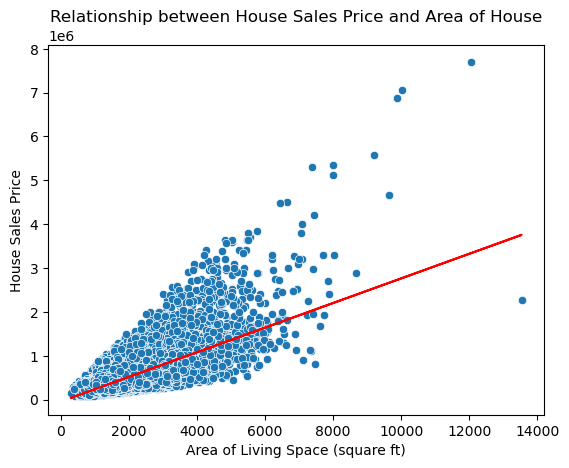

In [25]:
sns.scatterplot(data=home, x='sqft_living',y='price')
plt.plot(X, linreg.predict(X), 'r-') 
plt.title('Relationship between House Sales Price and Area of House')
plt.xlabel('Area of Living Space (square ft)')
plt.ylabel('House Sales Price')
plt.show()

In [26]:
X_new = [[2650]]

In [27]:
linreg.predict(X_new)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([700071.71125207])

In [28]:
y_new = [800000]

In [29]:
(y_new - linreg.intercept_)/linreg.coef_

array([3006.09371639])

In [30]:
linreg.predict([[3006]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([799973.70097365])

In [31]:
X2 = home[['bedrooms']]
y2 = home.price

In [32]:
y2.shape

(21613,)

In [33]:
X2.shape

(21613, 1)

In [34]:
linreg2 = LinearRegression().fit(X2, y2)
print('linear model coeff (w): {}'
     .format(linreg2.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg2.intercept_))
print('R-squared score: {:.3f}'
     .format(linreg2.score(X2, y2)))

linear model coeff (w): [121716.12623836]
linear model intercept (b): 129802.357
R-squared score: 0.095


In [35]:
X2_new = [[3]]
linreg2.predict(X2_new)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([494950.736094])

In [36]:
housing_predictions1 = linreg.predict(X)
lin_mse1 = mean_squared_error(y, housing_predictions1)
lin_rmse1 = np.sqrt(lin_mse1)
lin_rmse1

261440.79072267728

In [37]:
housing_predictions2 = linreg2.predict(X2)
lin_mse2 = mean_squared_error(y2, housing_predictions2)
lin_rmse2 = np.sqrt(lin_mse2)
lin_rmse2

349230.1491907254

## PART 2

1. Load the breast cancer dataset. Import the functions `load_breast_cancer` from
`sklearn.datasets`.
2. Provide an explanation of the data set.
3. What are the features in the data set?
4. Create some basic visualization of the data set.
5. Split the data into training set (80%) and test set (20%) using random_state = 0.
6. Build KNN models with n_neighbors = {1, 2, 3, 4, 5}. Compare their performance on the
training set and test set. Which one is the best model?


1. Load the breast cancer dataset. Import the functions `load_breast_cancer` from
`sklearn.datasets`.
2. Provide an explanation of the data set.
3. What are the features in the data set?

In [41]:
from sklearn.datasets import load_breast_cancer 

In [80]:
bc = load_breast_cancer()
bc

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [47]:
print("Target names:", bc['target_names'])

Target names: ['malignant' 'benign']


In [51]:
print("Type of data:", type(bc['data']))

Type of data: <class 'numpy.ndarray'>


In [53]:
print("Shape of data:", bc['data'].shape)

Shape of data: (569, 30)


In [55]:
print("First five rows of data:\n", bc['data'][:5])

First five rows of data:
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02

In [57]:
print("Type of target:", type(bc['target']))

Type of target: <class 'numpy.ndarray'>


In [61]:
print("Shape of target:", bc['target'].shape)

Shape of target: (569,)


In [63]:
print("Target:\n", bc['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1

In [133]:
bc.target.sum()

357

### EXPLAINATION: The dataset is used for the  classification of breast cancer into malignant and benign categories. The dataset contains 569 rows and 30 columns which are the 30 features. There is also no missing value in the dataset. There are two targets in the dataset: 0 for malignant and 1 for beneign. There are 357 beneign cases and 212 malignant cases. Some key features are: radius, perimeter, area, smoothness, texture, fractal dimension error and etc. Features are also grouped into 3 main types: mean, standard error and worst. The dataset is in dictionary format. 

In [49]:
print("Feature names:\n", bc['feature_names'])

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


4. Create some basic visualization of the data set.

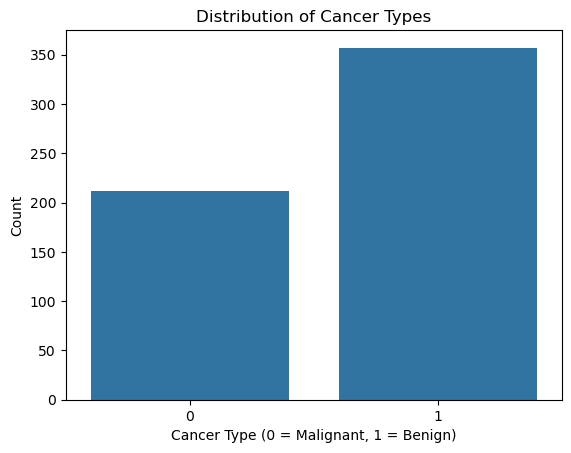

In [82]:
sns.countplot(x=bc.target)
plt.xlabel('Cancer Type (0 = Malignant, 1 = Benign)')
plt.ylabel('Count')
plt.title('Distribution of Cancer Types')
plt.show()

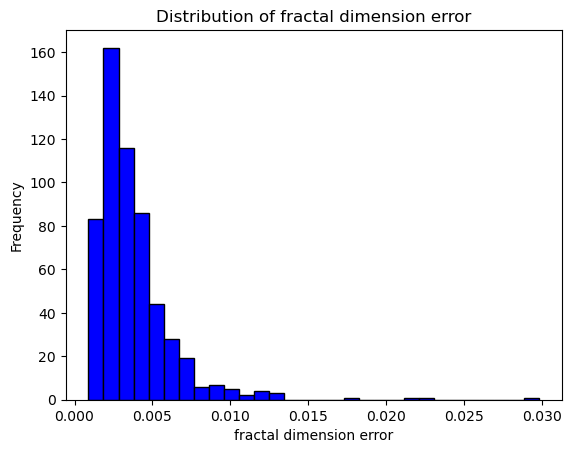

In [90]:
feature_index = 19  # Replace with desired feature index
plt.hist(bc.data[:, feature_index], bins=30, color='blue', edgecolor='black')
plt.xlabel(bc.feature_names[feature_index])
plt.ylabel('Frequency')
plt.title(f'Distribution of {bc.feature_names[feature_index]}')
plt.show()

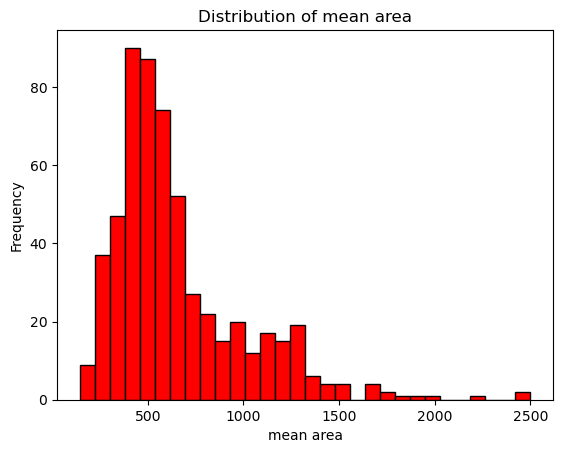

In [92]:
feature_index = 3  # Replace with desired feature index
plt.hist(bc.data[:, feature_index], bins=30, color='red', edgecolor='black')
plt.xlabel(bc.feature_names[feature_index])
plt.ylabel('Frequency')
plt.title(f'Distribution of {bc.feature_names[feature_index]}')
plt.show()

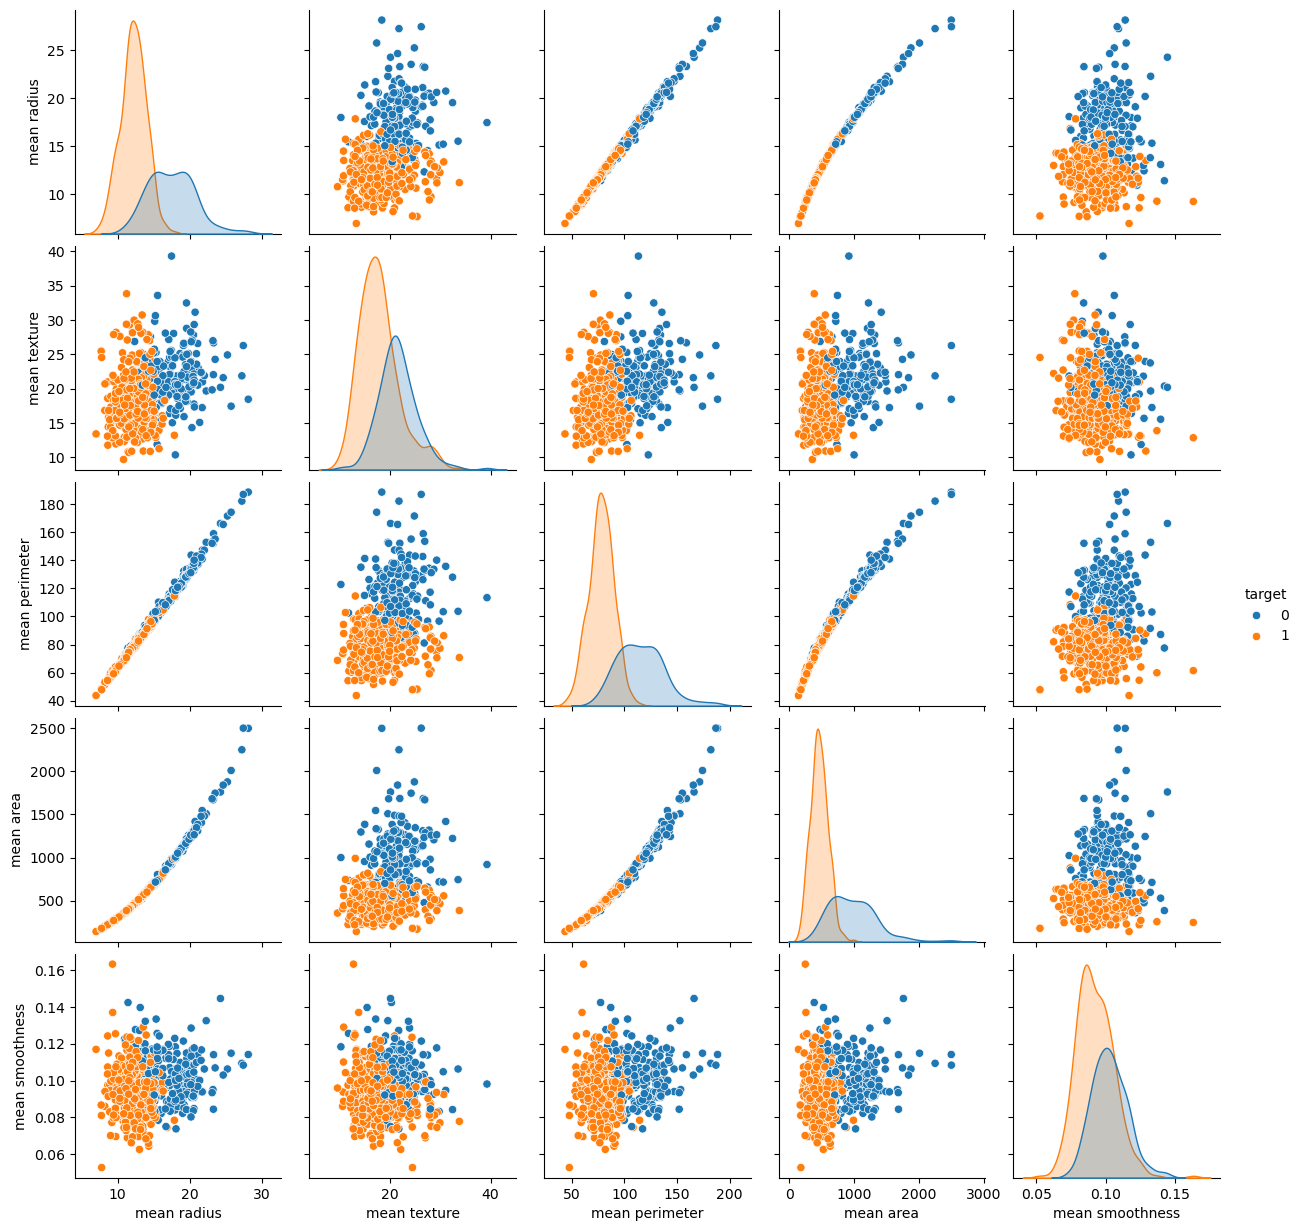

In [94]:
feature_df = pd.DataFrame(bc.data, columns=bc.feature_names)
feature_df['target'] = bc.target
sns.pairplot(feature_df, vars=bc.feature_names[:5], hue='target', diag_kind='kde')
plt.show()

5. Split the data into training set (80%) and test set (20%) using random_state = 0.
6. Build KNN models with n_neighbors = {1, 2, 3, 4, 5}. Compare their performance on the
training set and test set. Which one is the best model?

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    bc['data'], bc['target'], random_state=0, test_size = 0.2)

In [105]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (455, 30)
y_train shape: (455,)


In [107]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (114, 30)
y_test shape: (114,)


In [109]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [111]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [115]:
print("Training set score: {:.2f}".format(knn.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Training set score: 1.00
Test set score: 0.91


In [117]:
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train, y_train)
print("Training set score: {:.2f}".format(knn2.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn2.score(X_test, y_test)))

Training set score: 0.96
Test set score: 0.89


In [119]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
print("Training set score: {:.2f}".format(knn3.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn3.score(X_test, y_test)))

Training set score: 0.96
Test set score: 0.91


In [121]:
knn4 = KNeighborsClassifier(n_neighbors=4)
knn4.fit(X_train, y_train)
print("Training set score: {:.2f}".format(knn4.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn4.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.92


In [123]:
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
print("Training set score: {:.2f}".format(knn5.score(X_train, y_train)))
print("Test set score: {:.2f}".format(knn5.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.94


Model with 5 neighbors produces the best results as the training and test set scores are relatively similar and high. 